<h1>RandomForestClassifier</h1>
<p> The main objective of this model is to predict when the sharks will attack and performing exploratory data analysis. We should also determine the factors that might influence the shark attacks</p>

<p>We are using RandomForestClassifier to build our model.</p>

<p>The first step is to import all the required libraries.</p>

In [88]:
#import the required libraries
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
style.use('ggplot')

In [89]:
#import RandomForestClassifier from the scikit-learn library
from sklearn.ensemble import RandomForestClassifier


<p> Import the necessary pandas module for reading the csv file and then print the first five rows to make sure that CSV file was read without any errors</p>

In [90]:
#import pandas library 
#read the CSV file using Pandas Library
import pandas as pd
df= pd.read_csv("/Users/saikrishna/Downloads/Shark.csv", error_bad_lines=False, sep='\t')
#print the head of the dataframe.
print(df.head())

   X.2  X.1  X  Id     Date  ID  TurtleExactCountSC turtleexactdiscretizeSC  \
0    1    1  1   4   5/4/09  25                 0.0                     Low   
1    2    2  2   5   5/5/09  33                 0.0                     Low   
2    3    3  3   7   5/7/09  49                 1.0                     Low   
3    4    4  4   8   5/8/09  57                 0.0                     Low   
4    5    5  5  11  5/11/09  81                 2.0                     Low   

   TurtleExactCountNC  TurtleExactCombined       ...        \
0                 0.0                    0       ...         
1                 0.0                    0       ...         
2                 0.0                    0       ...         
3                 0.0                    0       ...         
4                 0.0                    1       ...         

  StationPressure_minmax  WindSpeed_minmax Salinity_minmax Turbidity_minmax  \
0               0.578947          0.333333        0.636021         0.0325

<h3>Exploratory Data Analysis</h3>

In [91]:
#check for duplicates
df_no_dups = df.drop_duplicates()
print(df_no_dups)
print(df_no_dups.shape)

     X.2  X.1    X    Id     Date   ID  TurtleExactCountSC  \
0      1    1    1     4   5/4/09   25                 0.0   
1      2    2    2     5   5/5/09   33                 0.0   
2      3    3    3     7   5/7/09   49                 1.0   
3      4    4    4     8   5/8/09   57                 0.0   
4      5    5    5    11  5/11/09   81                 2.0   
5      6    6    6    14  5/14/09  105                15.0   
6      7    7    7    16  5/16/09  121                 9.0   
7      8    8    8    18  5/18/09  137                 7.0   
8      9    9    9    27  5/27/09  209                23.0   
9     10   10   10    29  5/29/09  225                48.0   
10    11   11   11    34   6/3/09  265                48.0   
11    12   12   12    35   6/4/09  273                55.0   
12    13   13   13    38   6/7/09  297                45.0   
13    14   14   14    42  6/11/09  329                54.0   
14    15   15   15    46  6/15/09  367                62.0   
15    16

<p> Box Plot was generated to find out the relation-ship between Temperature and Attack </p>

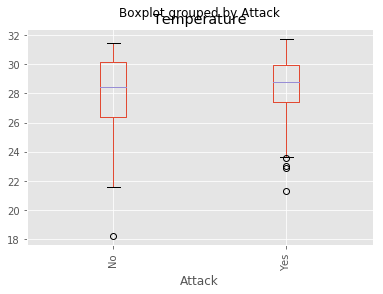

In [92]:
#boxplot 
df.boxplot(column='Temperature', by='Attack', rot=90)
#Display the plot
plt.show()

<p> A Scatter Plot was generated between the Dissolved Oxygen and Precipitation_Value</p>

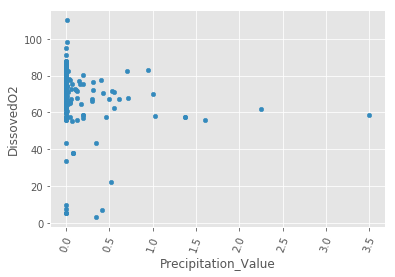

In [93]:
#Scatter plot 
df.plot(kind='scatter', x='Precipitation_Value', y='DissovedO2', rot=70)
#Display the plot
plt.show()

<p>The Next step is to find the missing values and replace all the missing values with mean of the column.</p>

<p>The same process is repeated for the next columns also. </p>

In [94]:
mean1 = df.Turbidity.mean()
print(mean1)
# Replace all the missing values in the DissovedO2 column with the mean
df['Turbidity'] = df.Turbidity.fillna(mean1)


38.295837333923075


In [95]:
mean1 = df.DissovedO2.mean()
print(mean1)
# Replace all the missing values in the DissovedO2 column with the mean
df['DissovedO2'] = df.DissovedO2.fillna(mean1)

67.67899683343403


In [96]:
mean1 = df.Temperature.mean()
print(mean1)
# Replace all the missing values in the Temperature column with the mean
df['Temperature'] = df.Temperature.fillna(mean1)

28.167617702307684


In [97]:
mean1 = df.WindSpeed.mean()
print(mean1)
# Replace all the missing values in the windspeedcolumn with the mean
df['WindSpeed'] = df.WindSpeed.fillna(mean1)

6.551648351648349


In [98]:
mean1 = df.Salinity.mean()
print(mean1)
# Replace all the missing values in the Salinity column with the mean
df['Salinity'] = df.Salinity.fillna(mean1)

26.199711008340675


In [99]:
df.fillna(0, inplace=True)

<p> The next step is to seperate the data and then finding out the shape  to make sure that no errors occured while seperating the data.</p>

In [100]:
columns_target=['Attack']

columns_train=['Precipitation_Value','StationPressure','WindSpeed','Salinity','Turbidity','Temperature','DissovedO2']
X=df[columns_train]
y=df[columns_target]
print(y.shape)
print(X.shape)


(186, 1)
(186, 7)


<p>The next step is to split the data into training set and testing set.</p>
<p>The final step is to fit the training data onto the model and making the predictions </p>

In [101]:
#RandomForestClassifier
#Splitting the data set into training set and testing set
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf= RandomForestClassifier()
#fitting the data to the model
clf.fit(X_train,y_train.values.ravel())
print(clf)
#make prediction and check the accuracy
print(clf.predict(X_test))
print(clf.score(X_test,y_test))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)
['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes']
0.842105263158


<h4> Citations : </h4>


<p> http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html</p>    
<p>https://stackoverflow.com</p>
<p>https://github.com/AKDDResearch/Shark-Attack</p>
 
Hands-On Machine Learning with Scikit-Learn and TensorFlow.